Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 313
Code Title: | Advanced Machine Learning and Deep Learning - Computer Vision (Crash Course)
1st Semester | AY 2024-2025
<u>**ACTIVITY NO. 6**</u> | <u>**Face Detection using OpenCV**</u>
**Name** | Cuadra, Audrick Zander
**Section** | CPE32S3
**Date Performed**: | February 21, 2025
**Date Submitted**: | February 21, 2025
**Instructor**: | Engr. Roman M. Richard

<hr>

## 1. Objectives

This activity aims to allow students to perform face detection on still images and videos using Haar cascades.

## 2. Intended Learning Outcomes (ILOs)
After this activity, the students should be able to:
* Utilize OpenCV to detect faces in still images and videos.
* Demonstrate the use of Haar-like features for detection of other human features.

## 3. Procedures and Outputs

Contrary to initial assumptions, conducting face detection on a static image and a video stream shares a remarkable similarity. Essentially, the latter is merely a sequential rendition of the former: when detecting faces in videos, it essentially involves applying face detection to every individual frame obtained from the camera feed. Of course, video face detection introduces additional elements like tracking, which aren't relevant to static images. Nevertheless, it's valuable to recognize that the fundamental principles behind both processes remain consistent.

### Performing face detection on still image

The first and most basic way to perform face detection is to load an image and detect faces in it. To make the result visually meaningful, we will draw rectangles around faces on the original image.

**Before implementing the code below**, check the contents of the `cv2.CascadeClassifier()` function. Provide an explanation of the function, its parameters before running the code below.

In [1]:
!pip install numpy
!pip install cv2
!pip install opencv-python==4.6.0.66

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\Audrick\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\Audrick\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for cv2


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\Audrick\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
# Make sure that for this activity, you have downloaded the
# file indicated below from the resource linked in the instructional materials
# in the module.

import cv2

picPath = "breaking_bad.jpg"
haarPath = "haarcascade_frontalface_default.xml"

def faceDetect(picPath, haarPath):
  face_cascade = cv2.CascadeClassifier(haarPath)

  img = cv2.imread(picPath)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  faces = face_cascade.detectMultiScale(gray, 1.2, 5)

  for (x, y, w, h) in faces:
    img = cv2.rectangle(img, (x, y), (x+w, y+h), (255,0,0), 1)

  cv2.imshow('Breaking Bad', img)
  cv2.waitKey(0)
  cv2.destroyAllWindows()

In [21]:
faceDetect(picPath, haarPath)


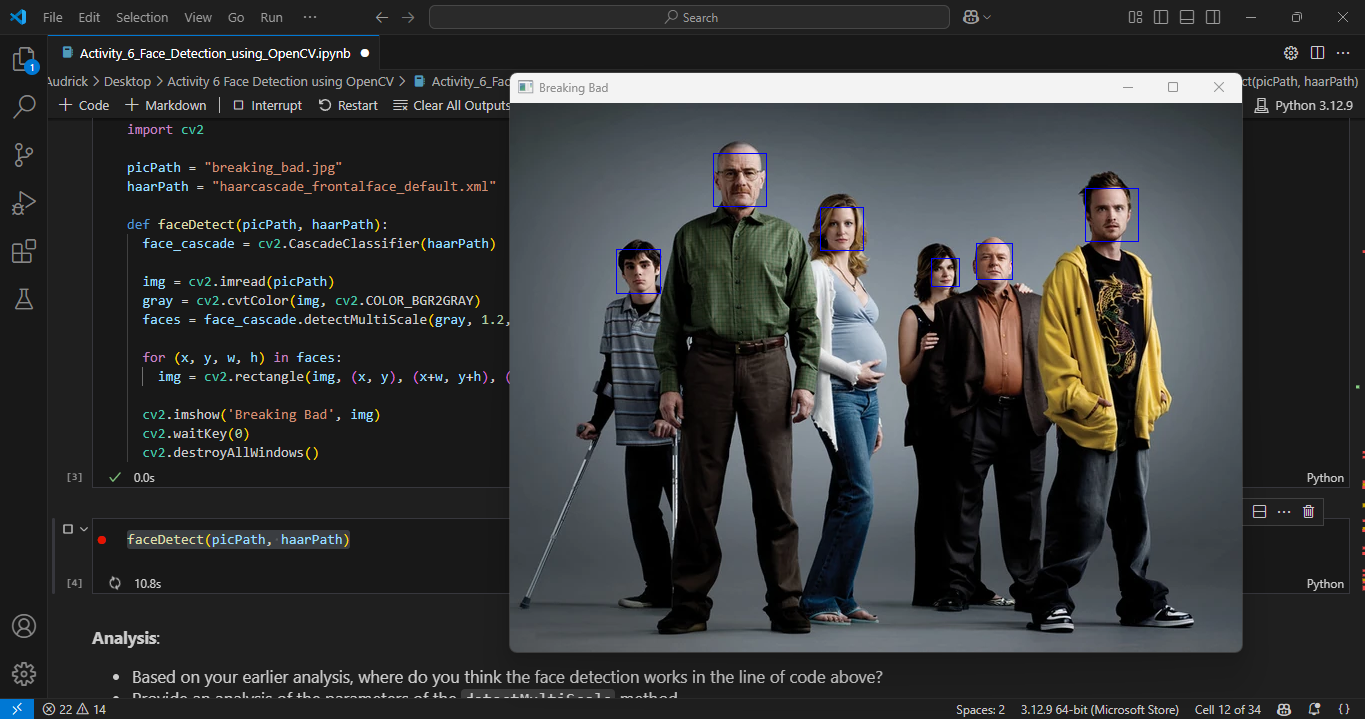

**Analysis**:
- Based on your earlier analysis, where do you think the face detection works in the line of code above?
- Provide an analysis of the parameters of the `detectMultiScale` method.
- Change the color of the border of the detected faces to red.
- Are you able to make the borders thicker? Demonstrate.

**Answers**:
1. The face detection works in the line `face_cascade.detectMultiScale(gray, 1.2, 5)`. The `detectMultiScale` method is used for object detection in an image, incorporating this with `face_cascade` model file provides it with the capability to detect a face.

2. The `detectMultiScale` has 3 provided parameters. First, `gray` which is the grayscaled version of the original image to allow for face detection. Second, `1.3` refers to the reduction of image size per scale, in this case the specified scale refers to 30% reduction in image size per scale for easier face detection. Lastly, `5` refers to the minimum amount of neighboring rectangles to be considered as a possible face, the possible face with the highest number of overlapping neighbors is considered the real face.

**Border Detection (Red)**

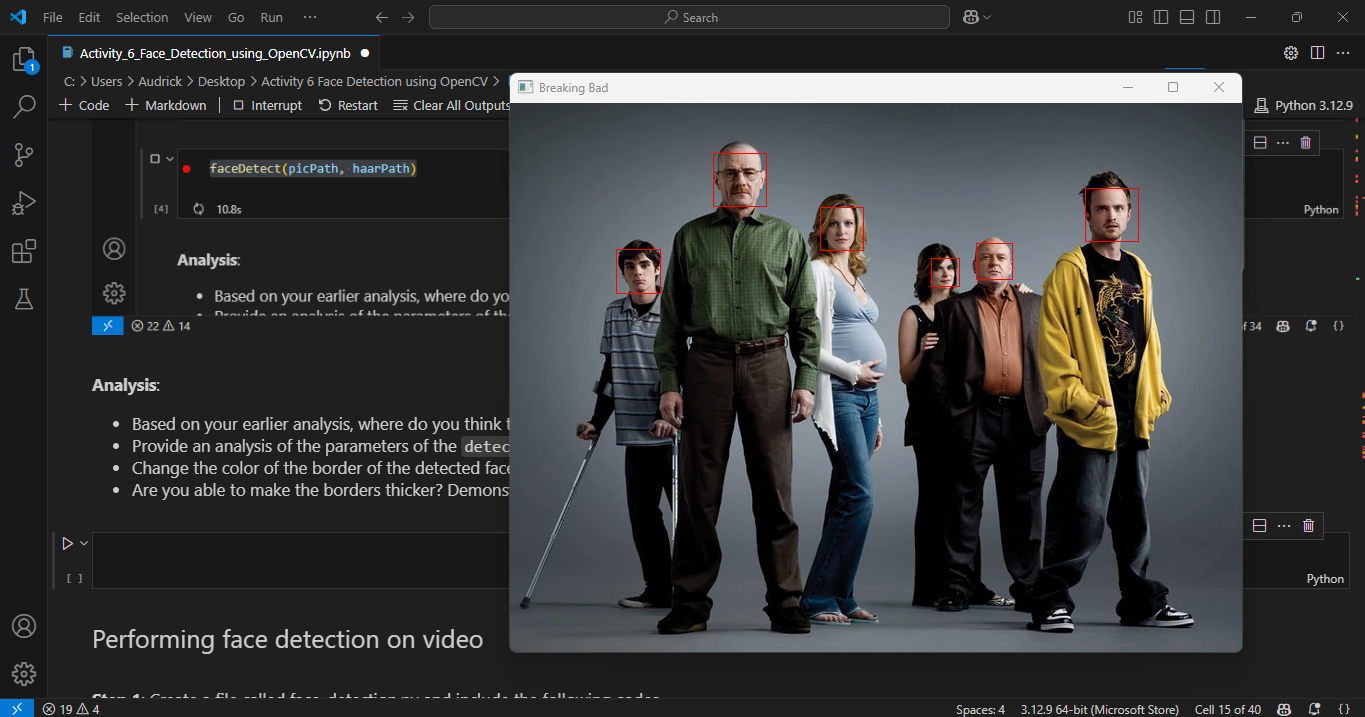

**Thicker Border Detection**

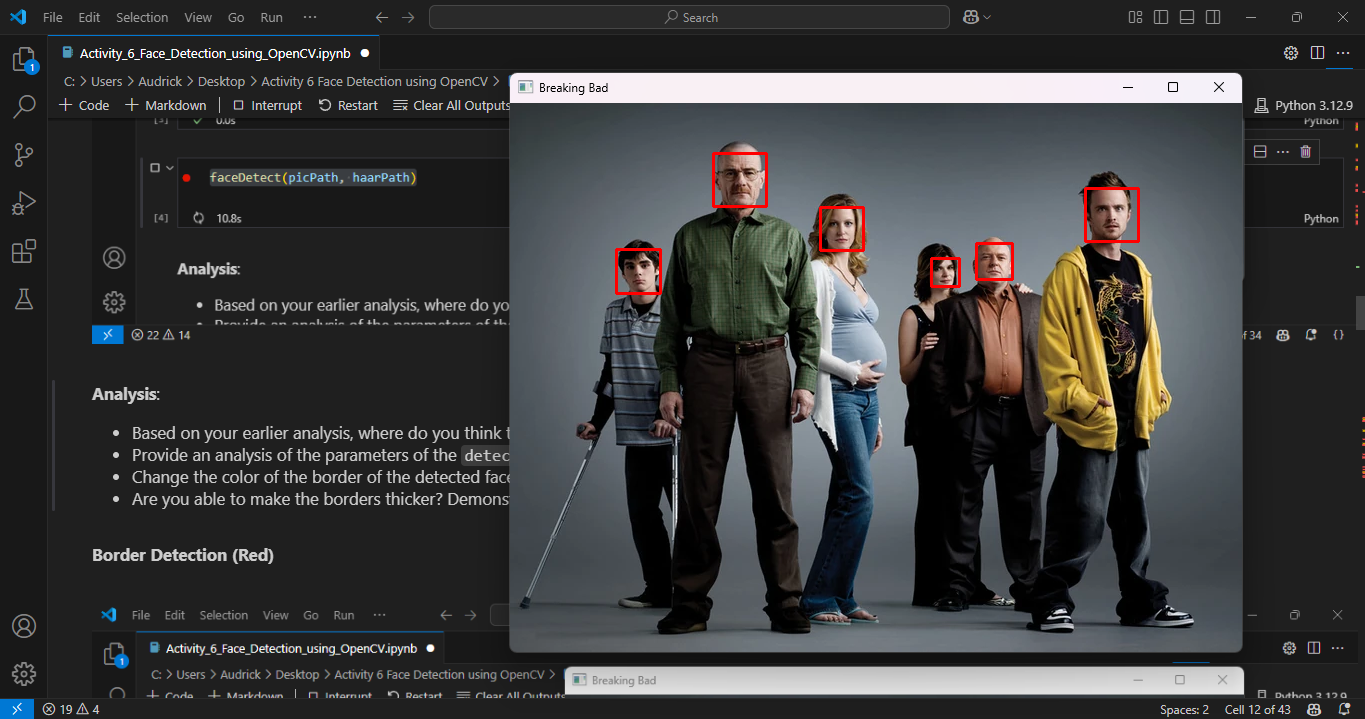

### Performing face detection on video

**Step 1**: Create a file called face_detection.py and include the following codes.

In [5]:
import cv2

**Step 2:** After this, we declare a method, `detect()`, which will perform face detection.

In [ ]:
def detect():
  face_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
  eye_cascade = cv2.CascadeClassifier('/content/haarcascade_eye.xml')
  camera = cv2.VideoCapture(0)

**Step 3:** The first thing we need to do inside the detect() method is to load the Haar cascade files so that OpenCV can operate face detection. As we copied
the cascade files in the local `cascades/` folder, we can use a relative path. Then, we open a VideoCapture object (the camera feed). The VideoCapture  constructor takes a parameter, which indicates the camera to be used; zero indicates the first camera available.

In [ ]:
  while (True):
    ret, frame = camera.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

**Step 4:** Next up, we capture a frame. The read() method returns two values: a Boolean indicating the success of the frame read operation, and the frame
itself. We capture the frame, and then we convert it to grayscale. This is a necessary operation, because face detection in OpenCV happens in the grayscale color space:

In [ ]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

**Step 5:** Much like the single still image example, we call detectMultiScale on the grayscale version of the frame.

In [ ]:
  for (x,y,w,h) in faces:
    img = cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray, 1.03,
    5, 0, (40,40))

**Step 6:** Here we have a further step compared to the still image example: we create a region of interest corresponding to the face rectangle, and within this rectangle, we operate "eye detection". This makes sense as you wouldn't want to go looking for eyes outside a face (well, for human beings at least!).

In [ ]:
  for (ex,ey,ew,eh) in eyes:
    cv2.rectangle(img,(ex,ey),(ex+ew,ey+eh),
    (0,255,0),2)

**Step 7:** Again, we loop through the resulting eye tuples and draw green rectangles around them.

In [ ]:

    cv2.imshow("camera", frame)
    if cv2.waitKey(1000 / 12) & 0xff == ord("q"):
      break

  camera.release()
  cv2.destroyAllWindows()

if __name__ == "__main__":
detect()

**Provide the following**:
- Screenshot of the output for the working code once you've put it all together.
- Summary of the steps you've performed along with observations.

In [7]:
import cv2

def detect():
  face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
  eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
  camera = cv2.VideoCapture(1)
  eyes= []

  while (True):
    ret, frame = camera.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x,y,w,h) in faces:
      img = cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
      roi_gray = gray[y:y+h, x:x+w]
      roi_color = frame[y:y + h, x:x + w]
      eyes = eye_cascade.detectMultiScale(roi_gray, 1.03, 5, 0, (40,40))

    for (ex,ey,ew,eh) in eyes:
      cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh), (0,255,0),2)

    cv2.imshow("camera", frame)
    if cv2.waitKey(int(1000 / 12)) & 0xff == ord("q"):
      break

  camera.release()
  cv2.destroyAllWindows()

if __name__ == "__main__":
  detect()

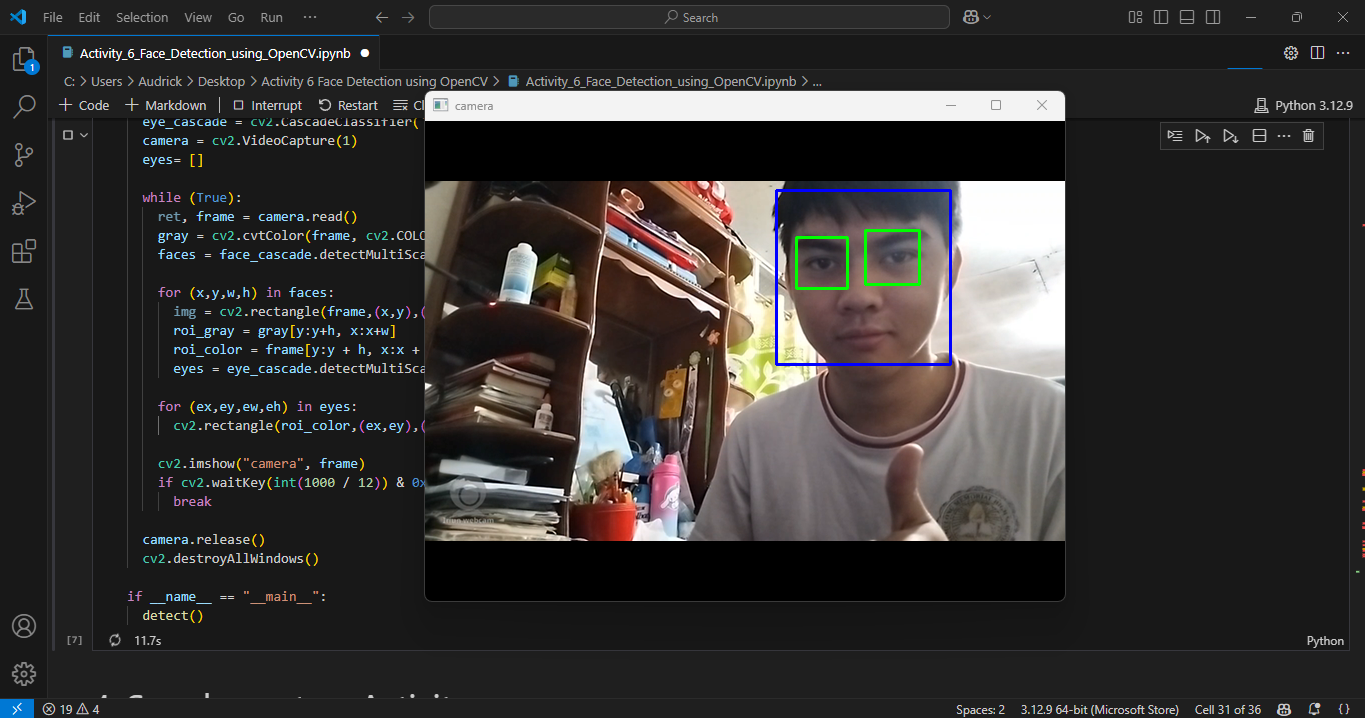

## 4. Supplementary Activity

In your Cameo project, include real-time face detection using Haar cascade. Show screenshots of the working demonstration for this supplementary activity.

Additionally, implement similar steps to detect a smile using Haar cascades.

In [16]:
import cv2

def detect():
  face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
  smile_cascade = cv2.CascadeClassifier('haarcascade_smile.xml')
  camera = cv2.VideoCapture(1)
  smiles= []

  while (True):
    ret, frame = camera.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x,y,w,h) in faces:
      img = cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
      roi_gray = gray[y:y+h, x:x+w]
      roi_color = frame[y:y + h, x:x + w]
      smiles = smile_cascade.detectMultiScale(roi_gray, 1.3, 22)

    for (sx,sy,sw,sh) in smiles:
      cv2.rectangle(roi_color,(sx,sy),(sx+sw,sy+sh), (0,255,0),2)

    cv2.imshow("camera", frame)
    if cv2.waitKey(int(1000 / 12)) & 0xff == ord("q"):
      break

  camera.release()
  cv2.destroyAllWindows()

if __name__ == "__main__":
  detect()

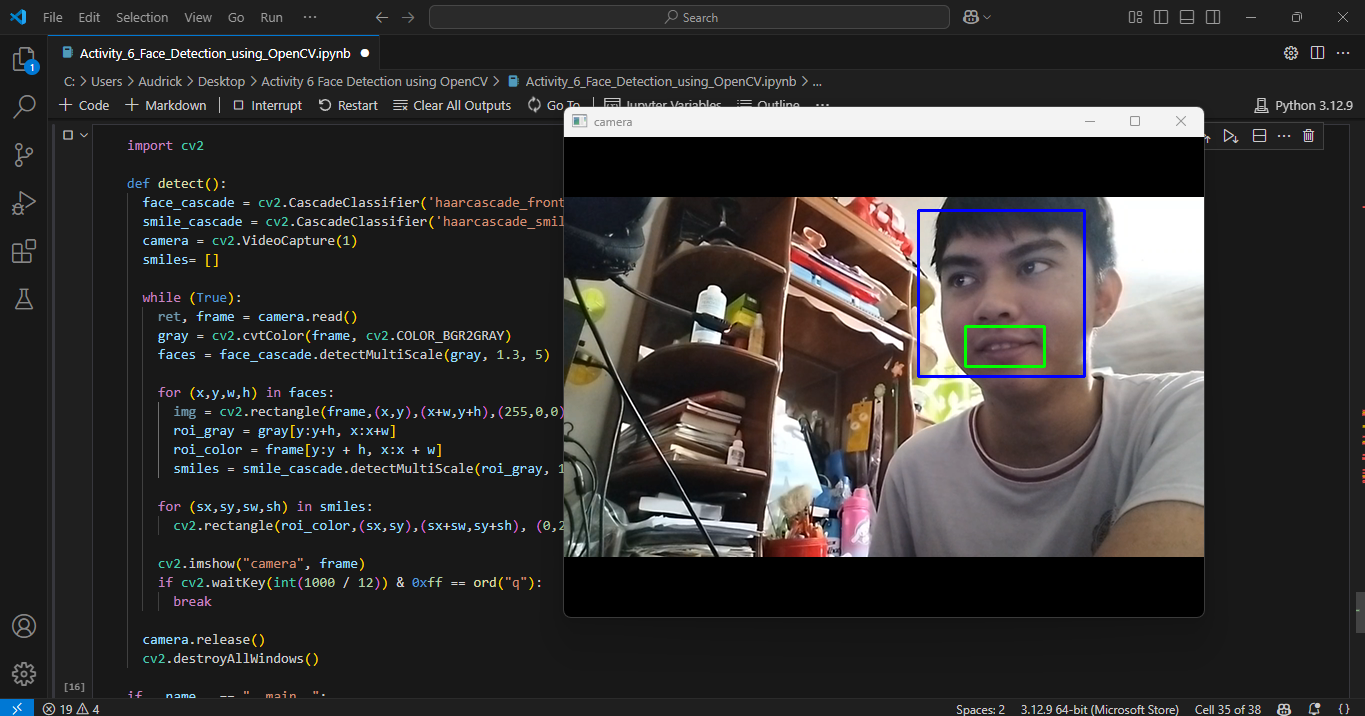

## 5. Summary, Conclusions and Lessons Learned

The activity provided the fundamentals of face detection using OpenCV. The implementation of haarcascade to detect different faces and face features was done in both image and real-time. I have learned the importance of tuning the parameters to yield great results in detections while reducing misdetection. Overall, this gave me insights in the functionality of OpenCV used for face detection, this knowledge would help with any future project that may require such features.

<hr/>

***Proprietary Clause***

*Property of the Technological Institute of the Philippines (T.I.P.). No part of the materials made and uploaded in this learning management system by T.I.P. may be copied, photographed, printed, reproduced, shared, transmitted, translated, or reduced to any electronic medium or machine-readable form, in whole or in part, without the prior consent of T.I.P.*